<a href="https://colab.research.google.com/github/raydangaspar/covid-19/blob/master/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

# SIR Model (not the best modelling for covid)

S -> Susceptible

I -> Infected

R -> Recovered / Removed

Model for diseases in which susceptible individuals who become infected can become immune.

In [116]:
# N     -> Total population (S + I + R)
# beta  -> Infection rate
# gamma -> Recovery rate
# y     -> Initial conditions vector
# t     -> Grid of time points (in days)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [117]:
N = 1000    # Total population
beta = 1.0  # Infected person infects 1 other person per day
D = 14.0    # Infections lasts fourteen days
gamma = 1.0 / D

S0, I0, R0 = N-1, 1, 0  # initial conditions: one infected, rest susceptible

In [118]:
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [119]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

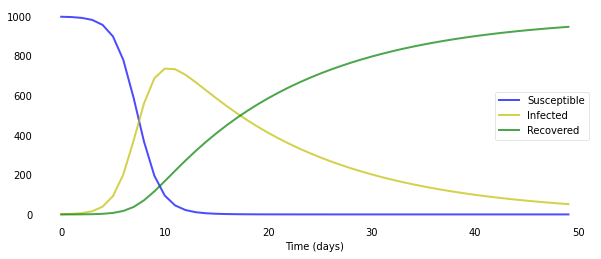

In [120]:
plotsir(t, S, I, R)

# SEIR Model to study Covid-19 propagation

S -> Susceptible

E -> Exposed

I -> Infected

R -> Recovered / Removed

Model for diseases in which susceptible individuals who become infected can become immune, but contemplates a latency period between the susceptible and infected period.

In [121]:
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  if D is not None:
    ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
  else:
    ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();

  if R0 is not None or CFR is not None:
    f = plt.figure(figsize=(12,4))
  
  if R0 is not None:
    # sp1
    ax1 = f.add_subplot(121)
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    # sp2
    ax2 = f.add_subplot(122)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show();

In [122]:
# N     -> Total population (S + E + I + R)
# beta  -> Infection rate
# gamma -> Recovery rate
# delta -> Incubation period
# y     -> Initial conditions vector
# t     -> Grid of time points (in days)
def deriv(y, t, N, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I / N
    dEdt = beta * S * I / N - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

# def deriv(y, t, beta, gamma, delta):
#     S, E, I, R = y
#     dSdt = -beta * S * I
#     dEdt = beta * S * I / N - delta * E
#     dIdt = delta * E - gamma * I
#     dRdt = gamma * I
#     return dSdt, dEdt, dIdt, dRdt

In [123]:
N = 1_000_000
# mild cases (80%) - 2 weeks, moderate cases (15%) - 2 ~ 8 weeks, severe cases (5%) - 
D = 14.0             # infections lasts fourteen days in mild cases
gamma = 1.0 / D
delta = 1.0 / 5.0   # incubation period of five days (1 to 12 days, but 5 days on average)
R_0 = 4.0
beta = R_0 * gamma  # R_0 = beta / gamma, so beta = R_0 * gamma
S0, E0, I0, R0 = N-1, 100, 0, 0  # initial conditions: one exposed

In [124]:
t = np.linspace(0, 159, 160) # Grid of time points (in days)
y0 = S0, E0, I0, R0 # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta))
# ret = odeint(deriv, y0, t, args=(beta, gamma, delta))
S, E, I, R = ret.T

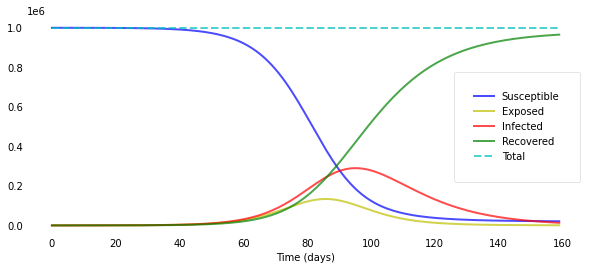

In [125]:
plotseird(t, S, E, I, R)

# LMFIT (A python tool for model fitting) - Covid-19 model

Non-Linear Least Squares Minimization, with flexible Parameter settings, based on scipy.optimize.leastsq, and with many additional classes and methods for curve fitting 

In [126]:
# Minimazation library
# Fit a model to a bunch of dataset
# S difference^2 = S [yi(actual) - yi(model)]^2

In [127]:
!pip install lmfit

In [128]:
from lmfit import minimize, Parameters, report_fit, fit_report

In [129]:
def plotdata(t, s, e, i, r):
    # plot the data
    fig = plt.figure(figsize=(12,6))
    ax = [fig.add_subplot(221, axisbelow=True), 
          fig.add_subplot(223),
          fig.add_subplot(122)]

    ax[0].plot(t, s, lw=3, label='Fraction Susceptible')
    ax[0].plot(t, i, lw=3, label='Fraction Infective')
    ax[0].plot(t, r, lw=3, label='Recovered')
    ax[0].set_title('Susceptible and Recovered Populations')
    ax[0].set_xlabel('Time /days')
    ax[0].set_ylabel('Fraction')

    ax[1].plot(t, i, lw=3, label='Infective')
    ax[1].set_title('Infectious Population')
    if e is not None: ax[1].plot(t, e, lw=3, label='Exposed')
    ax[1].set_ylim(0, 0.3)
    ax[1].set_xlabel('Time /days')
    ax[1].set_ylabel('Fraction')

    ax[2].plot(s, i, lw=3, label='s, i trajectory')
    ax[2].plot([1/R0, 1/R0], [0, 1], '--', lw=3, label='di/dt = 0')
    ax[2].plot(s[0], i[0], '.', ms=20, label='Initial Condition')
    ax[2].plot(s[-1], i[-1], '.', ms=20, label='Final Condition')
    ax[2].set_title('State Trajectory')
    ax[2].set_aspect('equal')
    ax[2].set_ylim(0, 1.05)
    ax[2].set_xlim(0, 1.05)
    ax[2].set_xlabel('Susceptible')
    ax[2].set_ylabel('Infectious')

    for a in ax: 
        a.grid(True)
        a.legend()

    plt.tight_layout()

In [130]:
# SEIR model
def deriv(y, t, beta, gamma, delta):
    S, E, I, R = y
    dSdt = -beta * S * I
    dEdt = beta * S * I - delta * E
    dIdt = delta * E - gamma * I
    dRdt = gamma * I
    return dSdt, dEdt, dIdt, dRdt

In [131]:
incubation_time = 5.0                   # Incubation period of five days (1 to 12 days, but 5 days on average)
infective_time = 3.0                    # Infectious period may start 1 to 3 days before you develop symptoms
gamma = 1 / infective_time              # Recovery rate
delta = 1 / incubation_time             # Incubation period
R0 = 4                                  # Basic reproductive number
beta = R0 * gamma                       # Infection rate
 
# initial conditions
E_initial = 1/20000
I_initial = 0.00
R_initial = 0.00
S_initial = 1 - E_initial - I_initial - R_initial

In [132]:
days = 160
t = np.linspace(0, days, days)                  # Grid of time points (in days)
y0 = S_initial, E_initial, I_initial, R_initial # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(beta, gamma, delta))
S, E, I, R = ret.T

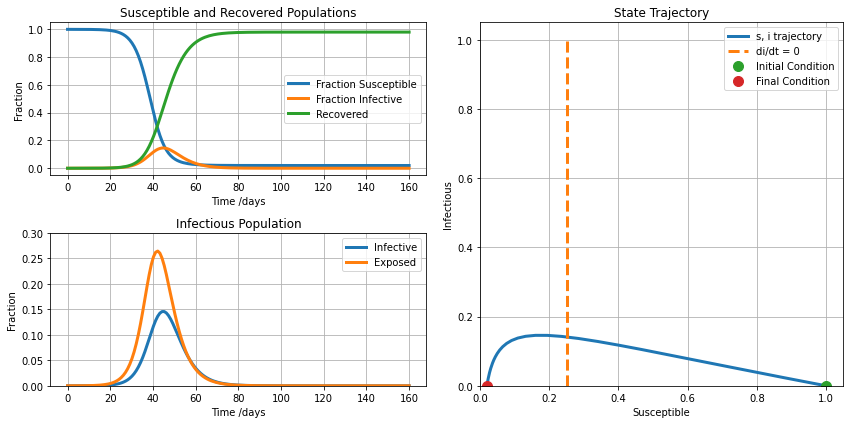

In [133]:
plotdata(t, S, E, I, R)

# Fitting

In [134]:
# determinar quem vai variar, só o beta varia
params = Parameters()

params.add('S_initial', value = S_initial, vary=False)
params.add('E_initial', value = E_initial, vary=False)
params.add('I_initial', value = I_initial, vary=False)
params.add('R_initial', value = R_initial, vary=False)
params.add('gamma', value = gamma, vary=False)
params.add('delta', value = delta, vary=False)

# params.add('beta', value = beta, vary=True, min=0)
params.add('beta', value = 1, vary=True, min=0)

In [135]:
def get_residual(params, data, x):
  S_initial = params['S_initial'].value
  E_initial = params['E_initial'].value
  I_initial = params['I_initial'].value
  R_initial = params['R_initial'].value
  
  gamma = params['gamma'].value
  delta = params['delta'].value

  # com que velocidade com que o covid está se propagando
  beta = params['beta'].value # variando

  print(f'Beta: {beta}')

  y0 = S_initial, E_initial, I_initial, R_initial

  ret = odeint(deriv, y0, x, args=(beta, gamma, delta))
  dSdt, dEdt, dIdt, dRdt = ret.T

  # vai aumentando o valor de beta para se aproximar da realidade dos dados
  return data - dIdt

In [136]:
# days = 8
days = 160
x = np.linspace(0, days, days)
# criar com característica exponencial
# número de infectados (dados "reais")
# data = np.array([0.1, 0.13, 0.19, 0.28, 0.38, 0.5, 0.65, 0.8])
# data = curva de infectados ao longo do tempo
data = I

In [137]:
# Pegar os dados de infectados plotados acima, colocar o beta em 1, e tentar simular chegando no valor de 4/3
out = minimize(get_residual, params, args=(data, x))

Beta: 0.9999999999999998
Beta: 0.9999999999999998
Beta: 0.9999999999999998
Beta: 1.0000000223517418
Beta: 1.1422447511092737
Beta: 1.1422447760753451
Beta: 1.2878289522120383
Beta: 1.2878289797901146
Beta: 1.3320913441567974
Beta: 1.3320913725180534
Beta: 1.3333326904737124
Beta: 1.3333327188568656
Beta: 1.3333333333380275
Beta: 1.3333333617211918
Beta: 1.3333333333332638
Beta: 1.3333333333332638


In [138]:
out.params

name,value,standard error,relative error,initial value,min,max,vary
S_initial,0.99995000,0.00000000,(0.00%),0.99995,-inf,inf,False
E_initial,5.0000e-05,0.00000000,(0.00%),5e-05,-inf,inf,False
I_initial,0.00000000,0.00000000,,0.0,-inf,inf,False
R_initial,0.00000000,0.00000000,,0.0,-inf,inf,False
gamma,0.33333333,0.00000000,(0.00%),0.3333333333333333,-inf,inf,False
delta,0.20000000,0.00000000,(0.00%),0.2,-inf,inf,False
beta,1.33333333,5.4600e-15,(0.00%),1,0.00000000,inf,True


In [139]:
report_fit(out)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 160
    # variables        = 1
    chi-square         = 8.7422e-27
    reduced chi-square = 5.4982e-29
    Akaike info crit   = -10410.2899
    Bayesian info crit = -10407.2148
[[Variables]]
    S_initial:  0.99995 (fixed)
    E_initial:  5e-05 (fixed)
    I_initial:  0 (fixed)
    R_initial:  0 (fixed)
    gamma:      0.3333333 (fixed)
    delta:      0.2 (fixed)
    beta:       1.33333333 +/- 5.4600e-15 (0.00%) (init = 1)


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 160
    # variables        = 1
    chi-square         = 8.7422e-27
    reduced chi-square = 5.4982e-29
    Akaike info crit   = -10410.2899
    Bayesian info crit = -10407.2148
[[Variables]]
    S_initial:  0.99995 (fixed)
    E_initial:  5e-05 (fixed)
    I_initial:  0 (fixed)
    R_initial:  0 (fixed)
    gamma:      0.3333333 (fixed)
    delta:      0.2 (fixed)
    beta:       1.33333333 +/- 5.4600e-15 (0.00%) (init = 1)


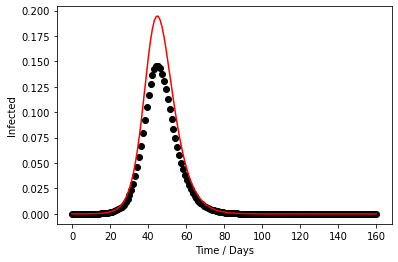

In [140]:
# Getting the fitted values
S_out = out.params['S_initial'].value
E_out = out.params['E_initial'].value
I_out = out.params['I_initial'].value
R_out = out.params['R_initial'].value

gamma_out = out.params['gamma'].value
delta_out = out.params['delta'].value

beta_out = out.params['beta'].value # variando 

# Pretty printing all the statistical data
print(fit_report(out))

plt.scatter(x,data,c='black')
plt.xlabel('Time / Days')
plt.ylabel('Infected')
plt.plot(x, data*beta, c='red', ls='-')
# plt.plot(t, A * np.exp(-lambdas*t)*np.cos(omega*t+phi),c='red',ls='-',lw=5)
plt.show();